In [1]:
library(MASS)
library(nnet)
library(caret)
library(dplyr)

Loading required package: ggplot2

Loading required package: lattice


Attaching package: 'dplyr'


The following object is masked from 'package:MASS':

    select


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
set.seed(42)
train_set = read.delim("data/train_set.txt", sep = " ")
test_set = read.delim("data/test_set.txt", sep = " ")

train_set["rain"] = NULL
train_set["rain_log"] = NULL

test_set["rain"] = NULL
test_set["rain_log"] = NULL

# WE WILL DELETE ALL MONTH VARIABLES
month_names = paste("month", 2:12, sep = "")
train_set[, month_names] = NULL
test_set[, month_names] = NULL

train_set[,"rain_class"] = as.factor(train_set[,"rain_class"])
test_set[,"rain_class"] = as.factor(test_set[,"rain_class"])

n_train = nrow(train_set)

In [3]:
exp_var = setdiff(names(train_set), c("rain_class"))
exp_var

[1] "ff"           "t"            "td"           "hu"           "dd"          
 [6] "precip_log"   "ws_arome"     "p3031_arome"  "u10_arome"    "v10_arome"   
[11] "t2m_arome"    "d2m_arome"    "r_arome"      "tp_arome_log" "msl_arome"

In [4]:
labels_to_num = function(labels){
    n = length(labels)
    num = rep(0, times = n)
    num[labels == 'no_rain'] = 1
    num[labels == 'low_rain'] = 2
    num[labels == 'high_rain'] = 3
    return(num)
}

In [5]:
x_train = train_set[, exp_var]
x_test = test_set[, exp_var]

y_train = as.factor(train_set[,"rain_class"])
y_test = as.factor(test_set[,"rain_class"])

y_train_num = labels_to_num(y_train)
y_test_num = labels_to_num(y_test)

In [6]:
MAPE = function(y, y_hat){
    # y = as.numeric(y)
    # y_hat = as.numeric(y_hat)
    mape = 100*mean(abs((y - y_hat)/y))
    return(mape)
}

MSE = function(y, y_hat){
    mse = mean((y - y_hat)**2)
    return(mse)
}

confusion_matrix = function(pred_class, true_class){
    tab = table(pred_class, true_class)
    print("Confusion matrix")
    print(tab)
    acc = sum(diag(tab)) / sum(tab)
    print(paste("Prediction accuracy : ", acc))
}

In [7]:
head(train_set)

,ff,t,td,hu,dd,precip_log,ws_arome,p3031_arome,u10_arome,v10_arome,t2m_arome,d2m_arome,r_arome,tp_arome_log,msl_arome,rain_class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-0.08621305,1.164777,0.9105351,-0.79823471,0.5200537,-0.82039852,-0.03659526,0.5297853,0.8019527,0.4007581,1.1187027,0.9208535,-0.69899841,-0.3621343,0.1533010,low_rain
2,-0.21529566,-1.471529,-1.6613332,-0.45471837,0.6958876,0.07889537,-0.25766440,1.3231433,0.5568977,-0.8887086,-1.5527261,-1.5824152,0.18145591,0.3535131,-0.9054914,high_rain
4,-1.46867996,0.129100,-0.1875101,-1.05685344,0.1290120,-0.82039852,-1.31752316,-0.8278199,-0.6050438,-0.6937063,0.2219311,-0.1249160,-1.14004178,-0.6698467,0.6887159,no_rain
5,1.02840090,-1.238485,-1.4212403,-0.49103295,1.0222052,0.26943290,0.46462317,1.0634977,1.1864348,-0.7170438,-1.1660485,-1.3825454,-0.53032676,0.4926930,0.8759910,no_rain
6,-1.46553799,-1.273800,-1.2888096,0.07576901,-0.8504800,-0.61244731,-1.27793928,-0.5881897,-0.4321987,0.1073955,-1.6551375,-1.7090362,0.05194278,-0.9410006,1.8945691,low_rain
8,2.36216728,-1.243795,-1.3614883,-0.33792281,-2.0645970,-0.82039852,1.53127621,-2.0125623,-2.3869380,-1.7343155,-1.0988396,-1.2270086,-0.29023814,-1.0305921,0.4655751,no_rain


## Neural Network for Classification

### One hidden-layer with softmax activation with Entropy loss

We fit a neural network (perceptron) with 5 units in the hidden-layer 

In [22]:
nnet.class = nnet(rain_class ~ ., data = train_set, size = 5, decay = 0.01, entropy = TRUE, maxit = 300)


# weights:  98
initial  value 622.520775 
iter  10 value 502.391423
iter  20 value 469.905200
iter  30 value 447.343723
iter  40 value 431.174709
iter  50 value 424.581700
iter  60 value 422.384781
iter  70 value 421.580571
iter  80 value 421.164517
iter  90 value 421.003663
iter 100 value 420.284055
iter 110 value 420.099475
iter 120 value 420.066476
iter 130 value 420.062730
iter 140 value 420.052317
iter 150 value 419.746548
iter 160 value 418.950353
iter 170 value 416.144664
iter 180 value 414.910711
iter 190 value 413.846650
iter 200 value 413.037408
iter 210 value 412.384284
iter 220 value 411.956885
iter 230 value 411.835767
iter 240 value 411.637760
iter 250 value 409.964685
iter 260 value 409.466114
iter 270 value 409.285554
iter 280 value 409.278453
iter 290 value 409.277933
final  value 409.277917 
converged


In [23]:
attributes(nnet.class)

$names
 [1] "n"             "nunits"        "nconn"         "conn"         
 [5] "nsunits"       "decay"         "entropy"       "softmax"      
 [9] "censored"      "value"         "wts"           "convergence"  
[13] "fitted.values" "residuals"     "lev"           "call"         
[17] "terms"         "coefnames"     "xlevels"      

$class
[1] "nnet.formula" "nnet"

In [24]:
nnet.class$entropy

[1] FALSE

#### Test accuracy

In [25]:
nnet_train_prediction <- data.frame(nnet.class$fitted.values) %>%
    mutate(max_prob = colnames(.)[apply(., 1, which.max)],
            label = y_train)
head(nnet_train_prediction)

,high_rain,low_rain,no_rain,max_prob,label
,<dbl>,<dbl>,<dbl>,<chr>,<fct>
1,0.0967067482,0.68619222,0.21710103,low_rain,low_rain
2,0.7293861037,0.22134533,0.04926856,high_rain,high_rain
4,0.0318939949,0.46734392,0.50076209,no_rain,no_rain
5,0.4028308245,0.38680271,0.21036646,high_rain,no_rain
6,0.0670736381,0.59086373,0.34206263,low_rain,low_rain
8,0.0006817325,0.08229994,0.91701833,no_rain,no_rain


In [26]:
confusionMatrix(factor(nnet_train_prediction$max_prob),
                factor(nnet_train_prediction$label),
                mode = "everything")

Confusion Matrix and Statistics

           Reference
Prediction  high_rain low_rain no_rain
  high_rain       101       29       7
  low_rain         49      171      61
  no_rain           5       34      93

Overall Statistics
                                          
               Accuracy : 0.6636          
                 95% CI : (0.6224, 0.7031)
    No Information Rate : 0.4255          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4762          
                                          
 Mcnemar's Test P-Value : 0.004353        

Statistics by Class:

                     Class: high_rain Class: low_rain Class: no_rain
Sensitivity                    0.6516          0.7308         0.5776
Specificity                    0.9089          0.6519         0.8997
Pos Pred Value                 0.7372          0.6085         0.7045
Neg Pred Value                 0.8692          0.7658         0.8373
Precision      

#### Test accuracy

In [27]:
nnet_test_prediction = predict(nnet.class, newdata = test_set, type = "class")
confusionMatrix(as.factor(nnet_test_prediction), y_test)

Confusion Matrix and Statistics

           Reference
Prediction  high_rain low_rain no_rain
  high_rain        19        8       7
  low_rain         11       34      27
  no_rain           3       16      13

Overall Statistics
                                          
               Accuracy : 0.4783          
                 95% CI : (0.3926, 0.5649)
    No Information Rate : 0.4203          
    P-Value [Acc > NIR] : 0.09836         
                                          
                  Kappa : 0.1884          
                                          
 Mcnemar's Test P-Value : 0.18021         

Statistics by Class:

                     Class: high_rain Class: low_rain Class: no_rain
Sensitivity                    0.5758          0.5862         0.2766
Specificity                    0.8571          0.5250         0.7912
Pos Pred Value                 0.5588          0.4722         0.4062
Neg Pred Value                 0.8654          0.6364         0.6792
Prevalence     

The prediction accuracy is not very accurate. So we need to tune the hyperparameters

### Hyperparameters tunning

In [29]:
library(e1071)

In [30]:
nnet.class.tune = tune.nnet(rain_class ~ ., data = train_set, 
        size = seq(5, 10, by = 1), decay = c(0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05), entropy = TRUE, maxit = 300)

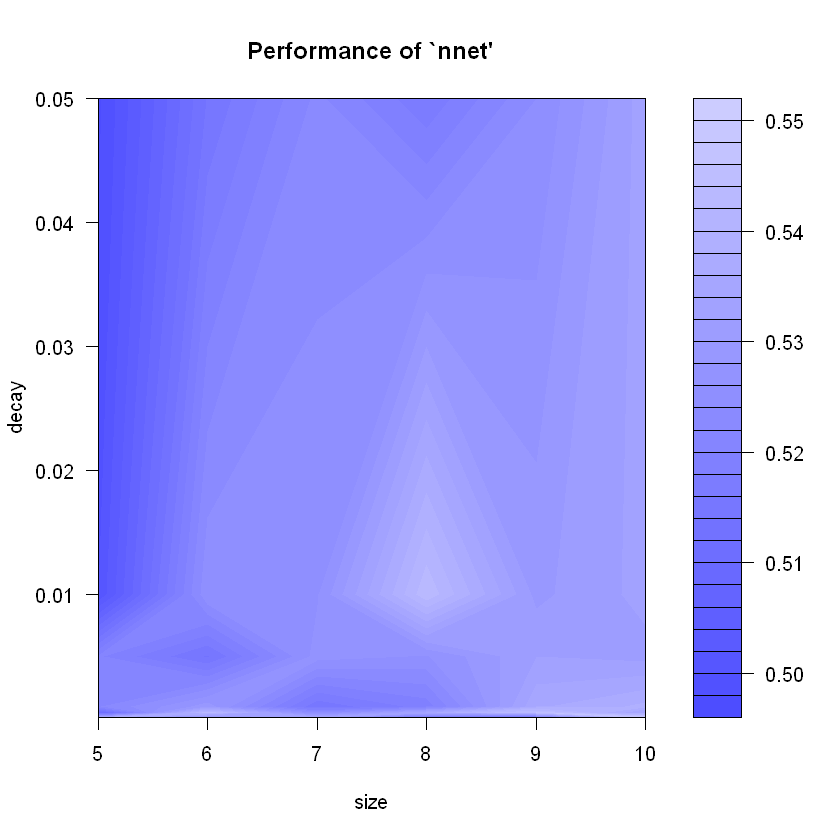

In [31]:
plot(nnet.class.tune)

In [32]:
attributes(nnet.class.tune)

$names
[1] "best.parameters"  "best.performance" "method"           "nparcomb"        
[5] "train.ind"        "sampling"         "performances"     "best.model"      

$class
[1] "tune"

In [33]:
nnet.class.tune$best.parameters

,size,decay
,<dbl>,<dbl>
31,5,0.05


In [42]:
nnet.class.tune$best.performance

[1] 0.4974545

In [37]:
nnet.class.best = nnet(rain_class ~ ., data = train_set, 
        size = 5, decay = 0.05, entropy = TRUE, maxit = 300)

# weights:  98
initial  value 698.326931 
iter  10 value 496.569445
iter  20 value 467.199553
iter  30 value 451.539418
iter  40 value 439.840133
iter  50 value 435.719315
iter  60 value 433.154764
iter  70 value 432.716582
iter  80 value 432.555652
iter  90 value 432.516553
iter 100 value 432.473510
iter 110 value 432.438667
final  value 432.438292 
converged


In [39]:
train_prediction <- data.frame(nnet.class.best$fitted.values) %>%
    mutate(max_prob = colnames(.)[apply(., 1, which.max)],
            label = y_train)

confusionMatrix(factor(train_prediction$max_prob),
                factor(train_prediction$label),
                mode = "everything")

Confusion Matrix and Statistics

           Reference
Prediction  high_rain low_rain no_rain
  high_rain        97       31       9
  low_rain         47      155      43
  no_rain          11       48     109

Overall Statistics
                                        
               Accuracy : 0.6564        
                 95% CI : (0.615, 0.696)
    No Information Rate : 0.4255        
    P-Value [Acc > NIR] : <2e-16        
                                        
                  Kappa : 0.472         
                                        
 Mcnemar's Test P-Value : 0.289         

Statistics by Class:

                     Class: high_rain Class: low_rain Class: no_rain
Sensitivity                    0.6258          0.6624         0.6770
Specificity                    0.8987          0.7152         0.8483
Pos Pred Value                 0.7080          0.6327         0.6488
Neg Pred Value                 0.8596          0.7410         0.8639
Precision                      0.

In [40]:
test_prediction = predict(nnet.class.best, newdata = test_set, type = "class")
confusionMatrix(as.factor(test_prediction), y_test)

Confusion Matrix and Statistics

           Reference
Prediction  high_rain low_rain no_rain
  high_rain        22        9       8
  low_rain          8       31      22
  no_rain           3       18      17

Overall Statistics
                                          
               Accuracy : 0.5072          
                 95% CI : (0.4209, 0.5933)
    No Information Rate : 0.4203          
    P-Value [Acc > NIR] : 0.02422         
                                          
                  Kappa : 0.2452          
                                          
 Mcnemar's Test P-Value : 0.43489         

Statistics by Class:

                     Class: high_rain Class: low_rain Class: no_rain
Sensitivity                    0.6667          0.5345         0.3617
Specificity                    0.8381          0.6250         0.7692
Pos Pred Value                 0.5641          0.5082         0.4474
Neg Pred Value                 0.8889          0.6494         0.7000
Prevalence     

## Neural Network for Regression